In [ ]:
# EcoTaxa data: classification of Plankton
# data source: https://www.seanoe.org/data/00446/55741/
# http://marine-imaging-workshop.com/documents/miw17/presentations/public/MIW17_Poster_MarcPicheral.pdf


### PROBLEM STATEMENT ###
# 1. build a classifier to classify images
# 2. see if the classifier can point out 'new' classes, not present in the training data (class, junk, other) ****
# 3. comparison of features performance: conventional vs deep-learning based ***


#### papers ####
#https://www.frontiersin.org/articles/10.3389/fmars.2019.00196/full  (review, Apr. 2019) -> understand features used **



#### challenges: ####
# 1. substantial re-training of pre-trained networks (transfer learning) or new network for gray-scale images?
#          -> find image size corresponding to the pre-trined network used

# 2. design of model & loss function suited to task  
# https://www.kaggle.com/iafoss/pretrained-resnet34-with-rgby-0-460-public-lb

# 3. handling class imbalance for image data (check for imbalance) ***
#    check total no. of classes, depth of each class (can classify at shallower level using taxonomic tree) 
#         --> try with 2 classes first
#  Luo et al, 2018 talks of different works - 4-class classification, 47 classes, 114 classes

# 4. handling outlier data?

# 5. are all images of same size? are they captured on same scale?  ***

# 6. handling large no. of classes (classification performance metric); one-hot encode classes

# 7. libraries to load & see image data

# 8. data pre-processing: is it necessary to create separate folders for train & test? ***
# 9. train-test data split

# 10. input shape (flatten image?); see how it should be fed into network ***
#     (k x k x C, where k: image dimension, C: np. of channels)


# 11. handle overfitting , use of batches (batch normalization) & epochs, early stopping, data augmentation, dropout regularization
# 12. choice of activation function (ReLU, softmax, etc), loss function (MSE, categorical_crossentropy, etc), 
#     metric (acc., recall)
# 13. hyper-parameter tuning: learning rate (else, adaptive learning rate like Adam)
# 14. how to apply scaling to intermediate layers


## is there a method to assess what is the best model that can be built from given data (in terms of metric values:
## RMSD for regresion, precision/recall for classification)



## activation function & vanishing gradient
## deep vs wide network (see excel: how no. of parameters changes)

In [ ]:
## RESOURCES
# sentdex youtube
# data camp
# pyimage
# machinelearningmastery

In [ ]:
# output layer is fully connected layer (model.add(Dense(n, ...)))
# where n=1 for regression;  or,   n=no. of classes 
# for binary classifier, should it be 1 with sigmoid (machinelearningmastery), or 2 with softmax activation (datacamp) ?

# for classification, should the labels be one-hot encoded?
# how to assign labels for multi-class classification

# input shape is specified in the first model.add layer
# images can be fed as numpy array, or from separate train test folders
# image pixels should be scaled
# apply transform for data augmentation, if required

# drop-out can be implemented after conv+pool block, & after fully connected (dense) block (except for last prediction layer) 
# learning rate is specified with optimizer under model.compile
# no. of epochs are specified in model.fit (increase epochs if both train & test loss continue to show downward trend w/o plateau)
# early stopping is specified in model.fit

In [ ]:
# colab:  https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2

# any code to automate the download of data to google colab, & run codes there?  ***

In [3]:
import sys
print(sys.executable)  # prints location of executable

C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\python.exe


In [2]:
print(sys.version)   # prints python version
print('')
print(sys.version_info)

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)


In [3]:
# https://pypi.org/project/Pillow/2.2.1/
!pip install Pillow

In [4]:
#from PIL import Image  # Utilities to read and write images in various formats.

In [3]:
from scipy.misc import imread  # # Utilities to read and write images in various formats.
# the above 2 lines are from  https://www.kaggle.com/allunia/protein-atlas-exploration-and-baseline#Preparation-
# equivalent options could be
#from skimage.io import imread 
#import imageio

ImportError: cannot import name 'imread'

In [4]:
from skimage.io import imread 

ModuleNotFoundError: No module named 'skimage'

In [5]:
!pip install imageio

In [7]:
!pip install pathlib

  Stored in directory: C:\Users\DAR9KOR\AppData\Local\pip\Cache\wheels\f9\b2\4a\68efdfe5093638a9918bd1bb734af625526e849487200aa171
Successfully built pathlib


In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
from PIL import Image  # Utilities to read and write images in various formats.
import imageio     ## are both imageio & Pillow (PIL) required ?
import pathlib   # alternate to os.path

In [2]:
import keras

Using TensorFlow backend.
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\DAR9KOR\AppData\Local\Continuum\anaconda3\envs\deep_learn\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

In [2]:
## list the number of files in each folder

%ls "57398/ZooScanSet/Imgs"

 Volume in drive C is Windows
 Volume Serial Number is 4EA5-3BC1

 Directory of C:\Users\DAR9KOR\Desktop\data\sample_datasets\EcoTaxa\57398\ZooScanSet\Imgs

07/04/2018  08:17 PM    <DIR>          .
07/04/2018  08:17 PM    <DIR>          ..
07/04/2018  08:19 PM    <DIR>          Acantharea
07/04/2018  08:19 PM    <DIR>          Acartiidae
07/04/2018  08:20 PM    <DIR>          Actinopterygii
07/04/2018  08:20 PM    <DIR>          Aglaura
07/04/2018  08:19 PM    <DIR>          Annelida
07/04/2018  08:20 PM    <DIR>          artefact
07/04/2018  08:20 PM    <DIR>          badfocus__artefact
07/04/2018  08:19 PM    <DIR>          badfocus__Copepoda
07/04/2018  08:20 PM    <DIR>          Bivalvia__Mollusca
07/04/2018  08:19 PM    <DIR>          Brachyura
07/04/2018  08:20 PM    <DIR>          bubble
07/04/2018  08:19 PM    <DIR>          Calanidae
07/04/2018  08:19 PM    <DIR>          Calanoida
07/04/2018  08:19 PM    <DIR>          Calocalanus pavo
07/04/2018  08:19 PM    <DIR>          c

In [3]:
path = "C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs"
for dir,subdir,files in os.walk(path):
    print(dir + ", total files: " + str(len(files)))

C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs, total files: 0
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Acantharea, total files: 762
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Acartiidae, total files: 46772
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Actinopterygii, total files: 1621
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Aglaura, total files: 430
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Annelida, total files: 2315
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\artefact, total files: 3849
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\badfocus__artefact, total files: 100668
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\badfocus__Copepoda, total files: 881
C:/Users/DAR9KOR/Desktop/data/sample_datasets/E

C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Podon, total files: 1472
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Pontellidae, total files: 1431
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Pyrosomatida, total files: 372
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Rhincalanidae, total files: 1344
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Rhopalonema, total files: 342
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Salpida, total files: 7772
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Sapphirinidae, total files: 1474
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\scale, total files: 640
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs\Scyphozoa, total files: 86
C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/5

In [4]:
## check the number of unique classes
df = pd.read_csv("C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/taxa.csv")

In [5]:
df.head(1)

,objid,taxon,lineage
0,14426891,Neoceratium,/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/H...


In [6]:
df.lineage[1]

'/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/Holodinophyta/Dinophyceae/Gonyaulacales/Ceratiaceae/Neoceratium'

In [7]:
# tota; no. of distinct entries
df.lineage.nunique(dropna=True)

93

In [9]:
df.lineage.unique()

array(['/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/Holodinophyta/Dinophyceae/Gonyaulacales/Ceratiaceae/Neoceratium',
       '/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/Holodinophyta/Dinophyceae/Noctilucales/4/Noctilucaceae/Noctiluca',
       '/#/living/Eukaryota/Harosa/Rhizaria/Cercozoa/Thecofilosea/Phaeodaria',
       '/#/living/Eukaryota/Harosa/Rhizaria/Retaria/Acantharea',
       '/#/living/Eukaryota/Harosa/Rhizaria/Retaria/Foraminifera',
       '/#/living/Eukaryota/Harosa/Rhizaria/Retaria/Polycystinea/Spumellaria',
       '/#/living/Eukaryota/Harosa/Stramenopiles/Ochrophyta/Bacillariophyta/Coscinodiscophytina/Coscinodiscids/Coscinodiscus',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Annelida',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Annelida/larvae',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Annelida/Polychaeta/Errantia/Tomopteridae',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Arthropoda/Crustacea/Branchiopoda/Diplostra

In [10]:
Link = pd.DataFrame(df.lineage.unique(), columns={'Lineage'})
Link.head(1)

,Lineage
0,/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/H...


In [20]:
Link.loc[0,"Lineage"]

'/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/Holodinophyta/Dinophyceae/Gonyaulacales/Ceratiaceae/Neoceratium'

In [26]:
Link.loc[0,"Lineage"].split("/#/")[1].split("/")

['living',
 'Eukaryota',
 'Harosa',
 'Alveolata',
 'Myzozoa',
 'Holodinophyta',
 'Dinophyceae',
 'Gonyaulacales',
 'Ceratiaceae',
 'Neoceratium']

In [33]:
len(Link.loc[0,"Lineage"].split("/#/")[1].split("/"))

10

In [44]:
Link[["Length"]] = Link.Lineage.apply(lambda x: pd.Series(len(str(x).split("/#/")[1].split("/"))))

In [45]:
Link.head(1)

,Lineage,Length
0,/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/H...,10


In [46]:
Link.Length.max()

15

In [47]:
Link.Length.min()

2

In [57]:
Link.Length.unique()

array([10, 11,  7,  6,  9, 12,  8, 13, 14, 15,  3,  2], dtype=int64)

In [53]:
link2 = Link[~Link["Lineage"].str.contains('|'.join(['not-living', '/living/other/']))]

# not living -> has 2 or 3 levels
# living/other -> has 3 levels
# living/eukaryote/... -> min 6 levels,max 15 levels

In [54]:
link2.Length.min()

6

In [56]:
link2.Length.max()

15

In [55]:
link2.Lineage.unique()

array(['/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/Holodinophyta/Dinophyceae/Gonyaulacales/Ceratiaceae/Neoceratium',
       '/#/living/Eukaryota/Harosa/Alveolata/Myzozoa/Holodinophyta/Dinophyceae/Noctilucales/4/Noctilucaceae/Noctiluca',
       '/#/living/Eukaryota/Harosa/Rhizaria/Cercozoa/Thecofilosea/Phaeodaria',
       '/#/living/Eukaryota/Harosa/Rhizaria/Retaria/Acantharea',
       '/#/living/Eukaryota/Harosa/Rhizaria/Retaria/Foraminifera',
       '/#/living/Eukaryota/Harosa/Rhizaria/Retaria/Polycystinea/Spumellaria',
       '/#/living/Eukaryota/Harosa/Stramenopiles/Ochrophyta/Bacillariophyta/Coscinodiscophytina/Coscinodiscids/Coscinodiscus',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Annelida',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Annelida/larvae',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Annelida/Polychaeta/Errantia/Tomopteridae',
       '/#/living/Eukaryota/Opisthokonta/Holozoa/Metazoa/Arthropoda/Crustacea/Branchiopoda/Diplostra

In [ ]:
## find how to distribute the classes into diff. groups to reduce
#     i) data imbalance
#    ii) no. of classes considered 

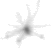

In [3]:
# upload the data & check some images; 

im_path = pathlib.Path('./57398/ZooScanSet/Imgs/Acantharea/42738931.jpg')  #.glob('*/images/*.png')
display(Image.open(im_path))  
# https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook
# how to open an image in jupyter notebook
# https://www.quora.com/How-do-I-load-multiple-images-in-Jupyter-Notebook-for-a-neural-network-classifier


#training_paths = pathlib.Path('../input/stage1_train').glob('*/images/*.png')
#training_sorted = sorted([x for x in training_paths])
#im_path = training_sorted[45]
#im = imageio.imread(str(im_path))

In [3]:
img = Image.open('./57398/ZooScanSet/Imgs/Acantharea/42738931.jpg')
print(img.size)  # width, heigth = img.size

(51, 48)


In [6]:
# check RGB or grayscale 'L'
img.mode

'L'

In [5]:
# get pixel values
list(img.getdata())

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 234,
 232,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 239,
 234,
 229,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 240,
 233,
 241,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255

In [6]:
len(list(img.getdata()))

2448

In [8]:
51 * 48

2448

In [10]:
# check the mode in the padded & resized images created for train-test

img = Image.open('./57398/ZooScanSet/runData_RGB/train/Acantharea/42738931.jpg')
print(img.size)  # width, heigth = img.size
print('')
print(img.mode)

(200, 200)

RGB


In [11]:
# get pixel values
list(img.getdata())

[(255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255, 255),
 (255, 255

In [12]:
len(list(img.getdata()))

40000

In [3]:
# check the mode in the padded & resized images created for train-test

img = Image.open('./57398/ZooScanSet/runData/train/Acantharea/42738931.jpg')
print(img.size)  # width, heigth = img.size
print('')
print(img.mode)

(200, 200)

L


In [4]:
img.getbands()

('L',)

In [4]:
# get pixel values
list(img.getdata())

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 254,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255

In [5]:
len(list(img.getdata()))

40000

In [5]:
## check mode for all modified images

im_paths = pathlib.Path('./57398/ZooScanSet/runData/').glob('*/*/*.jpg')
path_sorted = sorted([x for x in im_paths])
len(path_sorted)

2226

In [17]:
all_mode = []
for idx in range(len(path_sorted)):
    im_path = path_sorted[idx]
    img = Image.open(im_path)
    width, height = img.size
    m = img.mode
    #all_size[str(width) + '_' + str(height)] = ''  # saving height width as keys of dict
    all_mode.append([im_path,m, width, height])
    
#all_mode = pd.DataFrame(all_mode, columns=['path','mode'])

In [18]:
all_mode

[[WindowsPath('57398/ZooScanSet/runData/test/Acantharea/42755554.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/42761439.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/42773757.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/42940575.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/42952923.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/44721317.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/44721979.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/44723076.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/44726517.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/44726527.jpg'),
  'L',
  200,
  200],
 [WindowsPath('57398/ZooScanSet/runData/test/Acantharea/4472

In [8]:
len(all_mode)

2226

In [19]:
import pandas as pd
all_mode = pd.DataFrame(all_mode, columns=['path','mode','width','height'])
all_mode.head(1)

,path,mode,width,height
0,57398\ZooScanSet\runData\test\Acantharea\42755...,L,200,200


In [20]:
all_mode.to_csv("./57398/ZooScanSet/runData/mode.csv")

In [3]:
im_paths = pathlib.Path('./57398/ZooScanSet/Imgs/').glob('*/*.jpg')
path_sorted = sorted([x for x in im_paths])

In [16]:
# total no. of images
len(path_sorted)

1433278

915870


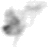

1363808


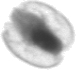

1350791


1248006


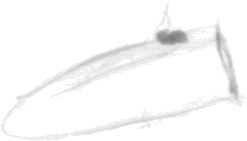

1424286


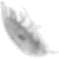

1121088


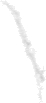

118921


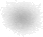

1116639


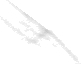

937499


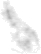

48777


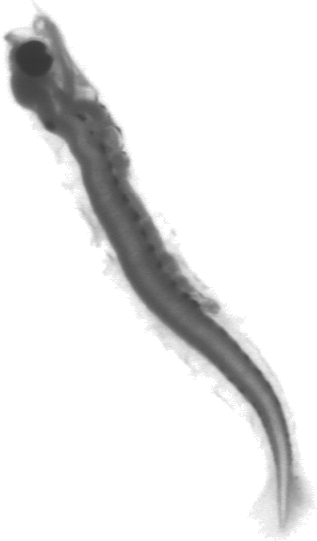

In [22]:
import random
'''fig, ax = plt.subplots(2,10,figsize=(10,2.8))
fig.suptitle("Example of images \n", fontsize=15)
axes = ax.ravel()
for i in range(20):
    # Pick a random number
    idx=random.randint(1,1000)
    axes[i].imshow(path_sorted[idx])
    axes[i].axis('off')
fig.tight_layout(pad=0.5)
plt.show()
'''

for i in range(10):
    # Pick a random number
    idx = random.randint(1,len(path_sorted))  #(1,1000)
    im_path = path_sorted[idx]
    print(idx)
    display(Image.open(im_path))  

In [31]:
# check size/ dimensions of all images
# https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python

#all_size = {}  # declare dict
all_size = []
for idx in range(len(path_sorted)):
    im_path = path_sorted[idx]
    img = Image.open(im_path)
    width, height = img.size
    #all_size[str(width) + '_' + str(height)] = ''  # saving height width as keys of dict
    all_size.append([im_path,width,height])
    
all_size = pd.DataFrame(all_size, columns=['path','width','height'])

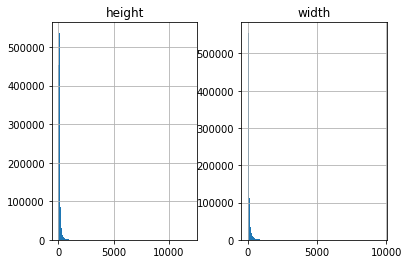

In [7]:
#all_size = all_size.drop(['Unnamed: 0'],1)
hist = all_size.hist(bins = 250)

In [32]:
#for key in all_size:
#    print(key)

all_size

,path,width,height
0,57398\ZooScanSet\Imgs\Acantharea\42738931.jpg,51,48
1,57398\ZooScanSet\Imgs\Acantharea\42745471.jpg,62,64
2,57398\ZooScanSet\Imgs\Acantharea\42749479.jpg,31,50
3,57398\ZooScanSet\Imgs\Acantharea\42752828.jpg,52,24
4,57398\ZooScanSet\Imgs\Acantharea\42753489.jpg,58,56
5,57398\ZooScanSet\Imgs\Acantharea\42754156.jpg,40,48
6,57398\ZooScanSet\Imgs\Acantharea\42754317.jpg,33,58
7,57398\ZooScanSet\Imgs\Acantharea\42754622.jpg,45,58
8,57398\ZooScanSet\Imgs\Acantharea\42755554.jpg,40,63
9,57398\ZooScanSet\Imgs\Acantharea\42761439.jpg,36,47


In [33]:
all_size.width.max()

9562

In [34]:
all_size.width.min()

6

In [35]:
all_size.height.max()

12005

In [36]:
all_size.height.min()

4

In [37]:
# write to a file (path, width & height of images)
all_size.to_csv("./57398/ZooScanSet/filesize.csv")

In [4]:
all_size = pd.read_csv("./57398/filesize.csv")

In [5]:
all_size.sort_values('width').head()

,Unnamed: 0,path,width,height
683762,683762,57398\ZooScanSet\Imgs\detritus\42950831.jpg,6,167
1172580,1172580,57398\ZooScanSet\Imgs\fiber__detritus\53318812...,7,195
610319,610319,57398\ZooScanSet\Imgs\detritus\34962014.jpg,7,5535
1127329,1127329,57398\ZooScanSet\Imgs\fiber__detritus\42950852...,7,193
149412,149412,57398\ZooScanSet\Imgs\badfocus__artefact\53090...,7,218


In [9]:
im_path = pathlib.Path('./57398/ZooScanSet/Imgs/detritus/42950831.jpg')  #.glob('*/images/*.png')
display(Image.open(im_path))  

In [6]:
all_size.sort_values('width').tail()

,Unnamed: 0,path,width,height
813884,813884,57398\ZooScanSet\Imgs\detritus\48015014.jpg,8243,389
833695,833695,57398\ZooScanSet\Imgs\detritus\48077700.jpg,8290,1882
834668,834668,57398\ZooScanSet\Imgs\detritus\48084347.jpg,8308,845
133825,133825,57398\ZooScanSet\Imgs\badfocus__artefact\46931...,8936,21
131609,131609,57398\ZooScanSet\Imgs\badfocus__artefact\46892...,9562,19


In [10]:
im_path = pathlib.Path('./57398/ZooScanSet/Imgs/badfocus__artefact/46892228.jpg')  #.glob('*/images/*.png')
display(Image.open(im_path))  

In [7]:
all_size.sort_values('height').head()

,Unnamed: 0,path,width,height
1149387,1149387,57398\ZooScanSet\Imgs\fiber__detritus\46946854...,6911,4
132538,132538,57398\ZooScanSet\Imgs\badfocus__artefact\46909...,390,5
132537,132537,57398\ZooScanSet\Imgs\badfocus__artefact\46909...,605,6
1153769,1153769,57398\ZooScanSet\Imgs\fiber__detritus\48092281...,189,6
700632,700632,57398\ZooScanSet\Imgs\detritus\43076620.jpg,181,7


In [11]:
im_path = pathlib.Path('./57398/ZooScanSet/Imgs/fiber__detritus/46946854.jpg')  #.glob('*/images/*.png')
display(Image.open(im_path))  

In [8]:
all_size.sort_values('height').tail()

,Unnamed: 0,path,width,height
758757,758757,57398\ZooScanSet\Imgs\detritus\46852977.jpg,53,9172
704247,704247,57398\ZooScanSet\Imgs\detritus\43097447.jpg,65,11482
695851,695851,57398\ZooScanSet\Imgs\detritus\43049626.jpg,52,11540
644338,644338,57398\ZooScanSet\Imgs\detritus\42703566.jpg,123,11774
1147480,1147480,57398\ZooScanSet\Imgs\fiber__detritus\46925336...,39,12005


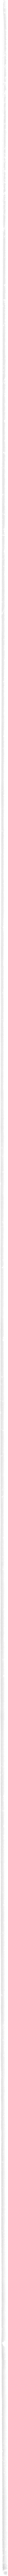

In [12]:
im_path = pathlib.Path('./57398/ZooScanSet/Imgs/fiber__detritus/46925336.jpg')  #.glob('*/images/*.png')
display(Image.open(im_path))  

In [9]:
## in 1st pass, leave out images in certain folders & check image sizes
#folders_to_remove = ['artefact', 'badfocus', 'bubble', 'detritus', 'multiple']
# all_size[~all_size.path.str.contains("artefact")]
#clean_path = all_size[~all_size['path'].isin(['artefact', 'badfocus', 'bubble', 'detritus', 'multiple'])]

clean_path = all_size[~all_size.path.str.contains("detritus")]
clean_path = clean_path[~clean_path.path.str.contains("artefact")]
clean_path = clean_path[~clean_path.path.str.contains("badfocus")]
clean_path = clean_path[~clean_path.path.str.contains("bubble")]
clean_path = clean_path[~clean_path.path.str.contains("multiple")]

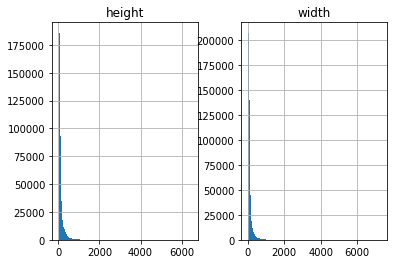

In [11]:
#clean_path = clean_path.drop(['Unnamed: 0'],1)
hist = clean_path.hist(bins = 250)

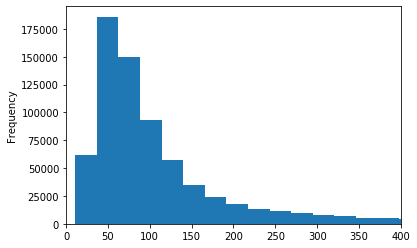

In [14]:
clean_path['height'].plot.hist(xlim=(0,400), bins=250)

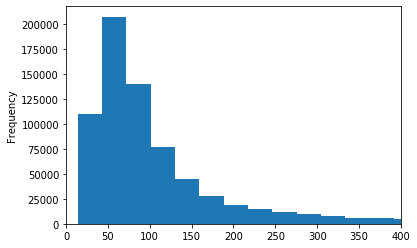

In [15]:
clean_path['width'].plot.hist(xlim=(0,400), bins=250)

In [35]:
clean_path.sort_values('width').head()

,Unnamed: 0,path,width,height
525827,525827,57398\ZooScanSet\Imgs\Creseidae\47890840.jpg,14,79
1084924,1084924,57398\ZooScanSet\Imgs\eudoxie__Diphyidae\48083...,15,73
1267876,1267876,57398\ZooScanSet\Imgs\Oikopleuridae\48213994.jpg,16,82
525117,525117,57398\ZooScanSet\Imgs\Creseidae\42779583.jpg,16,82
1332303,1332303,57398\ZooScanSet\Imgs\Oithonidae\48835548.jpg,16,80


In [36]:
clean_path.sort_values('width').tail()

,Unnamed: 0,path,width,height
1401813,1401813,57398\ZooScanSet\Imgs\Salpida\43000789.jpg,4447,2445
1407426,1407426,57398\ZooScanSet\Imgs\seaweed\48002506.jpg,4455,6435
1398385,1398385,57398\ZooScanSet\Imgs\Salpida\14464194.jpg,4686,1715
1401394,1401394,57398\ZooScanSet\Imgs\Salpida\42740133.jpg,4884,1692
48640,48640,57398\ZooScanSet\Imgs\Actinopterygii\46928174.jpg,7273,3910


In [37]:
clean_path.sort_values('height').head()

,Unnamed: 0,path,width,height
1298368,1298368,57398\ZooScanSet\Imgs\Oithonidae\42723626.jpg,74,11
462735,462735,57398\ZooScanSet\Imgs\Chaetognatha\34772697.jpg,100,12
1407690,1407690,57398\ZooScanSet\Imgs\seaweed\48200790.jpg,122,14
524425,524425,57398\ZooScanSet\Imgs\Creseidae\34744336.jpg,67,14
1237382,1237382,57398\ZooScanSet\Imgs\nauplii__Crustacea\42775...,47,14


In [38]:
clean_path.sort_values('height').tail()

,Unnamed: 0,path,width,height
1407421,1407421,57398\ZooScanSet\Imgs\seaweed\47992329.jpg,2960,4995
1404716,1404716,57398\ZooScanSet\Imgs\Salpida\48192739.jpg,4292,5496
1402386,1402386,57398\ZooScanSet\Imgs\Salpida\44763373.jpg,4143,5533
1407426,1407426,57398\ZooScanSet\Imgs\seaweed\48002506.jpg,4455,6435
1402448,1402448,57398\ZooScanSet\Imgs\Salpida\44892599.jpg,3883,6462


In [ ]:
# are all images of same size (height & width)? -> no

# are they captured on same scale (magnification)? -> no idea
# use Fiji/ ImageJ to check metadata of image (use voxel size? any other parameter)

In [1]:
## find largest and smallest file size
import os

In [14]:
fileSizeList = []

#for i in os.listdir("./57398/ZooScanSet/imgs/"):
#    if os.path.isfile(i):
#        fileSizeList.append((i, os.path.getsize(i)))

for root, dirs, files in os.walk("./57398/ZooScanSet/imgs/"):
    #print(dirs)
    for file in files:
        print(os.path)
        fileSizeList.append((file, os.path.getsize(file)))

<module 'ntpath' from 'C:\\Users\\DAR9KOR\\AppData\\Local\\Continuum\\anaconda3\\envs\\deep_learn\\lib\\ntpath.py'>


FileNotFoundError: [WinError 2] The system cannot find the file specified: '42738931.jpg'

In [6]:
largestSize = 0
smallestSize = 9999999

for fileName, fileSize in fileSizeList:
    if fileSize > largestSize:
        largestSize = fileSize
        largestFile = fileName
    
    if fileSize < smallestSize:
        smallestSize = fileSize
        smallestFile = fileName

In [7]:
print(largestFile, largestSize)

NameError: name 'largestFile' is not defined

In [ ]:
print(smallestFile, smallestSize)

In [ ]:
# 57398\ZooScanSet\Imgs\Actinopterygii\46928174.jpg
# width: 7273
# height: 3910
# filesize ~ 2.84 MB

In [4]:
os.listdir("./57398/ZooScanSet/imgs/")

['Acantharea',
 'Acartiidae',
 'Actinopterygii',
 'Aglaura',
 'Annelida',
 'artefact',
 'badfocus__artefact',
 'badfocus__Copepoda',
 'Bivalvia__Mollusca',
 'Brachyura',
 'bubble',
 'Calanidae',
 'Calanoida',
 'Calocalanus pavo',
 'calyptopsis',
 'Candaciidae',
 'Cavoliniidae',
 'Centropagidae',
 'Chaetognatha',
 'cirrus',
 'Copilia',
 'Corycaeidae',
 'Coscinodiscus',
 'Creseidae',
 'Ctenophora',
 'cyphonaute',
 'cypris',
 'Decapoda',
 'detritus',
 'Doliolida',
 'Echinoidea',
 'egg__Actinopterygii',
 'egg__Cavolinia_inflexa',
 'egg__other',
 'ephyra',
 'Eucalanidae',
 'Euchaetidae',
 'Euchirella',
 'eudoxie__Abylopsis_tetragona',
 'eudoxie__Diphyidae',
 'Evadne',
 'fiber__detritus',
 'Foraminifera',
 'Fritillariidae',
 'Gammaridea',
 'gonophore__Abylopsis_tetragona',
 'gonophore__Diphyidae',
 'Haloptilus',
 'Harpacticoida',
 'head',
 'Hyperiidea',
 'larvae__Annelida',
 'larvae__Crustacea',
 'Limacidae',
 'Limacinidae',
 'Luciferidae',
 'megalopa',
 'metanauplii',
 'multiple__Copepoda',

In [ ]:
os.walk()

In [39]:
# do a trial run with selected folders -> Acantharea, Copilia, cypris

searchfor = ['Acantharea', 'Copilia', 'cypris']
selected = all_size[all_size.path.str.contains('|'.join(searchfor))]

In [41]:
selected.shape

(2226, 4)

In [42]:
selected.head()

,Unnamed: 0,path,width,height
0,0,57398\ZooScanSet\Imgs\Acantharea\42738931.jpg,51,48
1,1,57398\ZooScanSet\Imgs\Acantharea\42745471.jpg,62,64
2,2,57398\ZooScanSet\Imgs\Acantharea\42749479.jpg,31,50
3,3,57398\ZooScanSet\Imgs\Acantharea\42752828.jpg,52,24
4,4,57398\ZooScanSet\Imgs\Acantharea\42753489.jpg,58,56


In [43]:
selected.tail()

,Unnamed: 0,path,width,height
535970,535970,57398\ZooScanSet\Imgs\cypris\53379699.jpg,61,32
535971,535971,57398\ZooScanSet\Imgs\cypris\53379790.jpg,59,34
535972,535972,57398\ZooScanSet\Imgs\cypris\53381346.jpg,52,45
535973,535973,57398\ZooScanSet\Imgs\cypris\53393818.jpg,47,34
535974,535974,57398\ZooScanSet\Imgs\cypris\53402647.jpg,33,50


In [44]:
selected.sort_values('height').tail()

,Unnamed: 0,path,width,height
498744,498744,57398\ZooScanSet\Imgs\Copilia\46926809.jpg,254,431
498834,498834,57398\ZooScanSet\Imgs\Copilia\46961537.jpg,208,437
498653,498653,57398\ZooScanSet\Imgs\Copilia\46893162.jpg,236,441
498615,498615,57398\ZooScanSet\Imgs\Copilia\46877544.jpg,161,455
498722,498722,57398\ZooScanSet\Imgs\Copilia\46921961.jpg,356,520


In [47]:
selected.sort_values('width').tail()

,Unnamed: 0,path,width,height
498719,498719,57398\ZooScanSet\Imgs\Copilia\46921277.jpg,389,399
498720,498720,57398\ZooScanSet\Imgs\Copilia\46921654.jpg,397,340
498778,498778,57398\ZooScanSet\Imgs\Copilia\46943489.jpg,401,195
498560,498560,57398\ZooScanSet\Imgs\Copilia\46852843.jpg,404,334
498356,498356,57398\ZooScanSet\Imgs\Copilia\43089756.jpg,408,252


In [60]:
# write to a file
selected.to_csv("C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/selected_files.csv")

In [50]:
'''!pip install opencv-python'''

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    opencv-python from https://files.pythonhosted.org/packages/9c/88/06cdc6239013e13aec97f474638fc4e7c00e5b7fb954a1d0ec2a5fc8db7a/opencv_python-4.1.1.26-cp36-cp36m-win_amd64.whl#sha256=9128924f5b58269ee221b8cf2d736f31bd3bb0391b92ee8504caadd68c8176a2:
        Expected sha256 9128924f5b58269ee221b8cf2d736f31bd3bb0391b92ee8504caadd68c8176a2
             Got        7b41a5d35613f039b1ff0db303a601fb672dc94d43304a1282640b19bf41c3e0



In [48]:
#import cv2
# not using cv2.resize() because of possible download issue

ModuleNotFoundError: No module named 'cv2'

In [ ]:
# re-sizing images
#https://stackoverflow.com/questions/44231209/resize-rectangular-image-to-square-keeping-ratio-and-fill-background-with-black/44231784

# as we go deeper into the network, the image gets smaller; hence can't start with very small images
# see size to be used for pre-trained network (if) chosen

In [51]:
# pad the images to square & make (increase or decrease) a common size

#from PIL import Image
'''
def make_square(im, min_size=256, fill_color=(0, 0, 0, 0)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
    return new_im
'''

def make_square(im, min_size=256, fill_color=(255, 255, 255, 0)):
    # fill_color=(0, 0, 0, 0) <- black
    # fill_color=(255, 255, 255, 0) <- white
    x, y = im.size
    
    # make square image,
    if x != y:
        size = max(x, y)
        new_im = Image.new('RGBA', (size, size), fill_color)
        new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
        #imResize = new_im.resize((min_size,min_size), Image.ANTIALIAS)
    else:
        new_im = im
        # resize images
        #imResize = im.resize((min_size,min_size), Image.ANTIALIAS)
           
    return new_im


def im_resize(im, min_size=256):
    # https://www.daniweb.com/programming/software-development/code/216637/resize-an-image-python
    x, y = im.size
    
    if x > min_size:  # downsample
        imResize = im.resize((min_size,min_size), Image.ANTIALIAS)
    elif x < min_size: # upsample
        imResize = im.resize((min_size, min_size), Image.BILINEAR)
    else:
        imResize = im
    
    return imResize

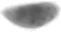

In [54]:
im_path = 'C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs/cypris/53379699.jpg'  # pathlib.Path('./57398/ZooScanSet/Imgs/cypris/53379699.jpg')
im = Image.open(im_path)
display(im) 

In [55]:
print(im.size)

(61, 32)


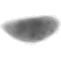

In [56]:
new_im = make_square(im)
display(new_im)

In [57]:
new_im.size

(61, 61)

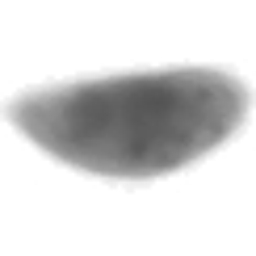

(256, 256)


In [58]:
imResize = im_resize(new_im)
display(imResize)
print(imResize.size)

(254, 431)


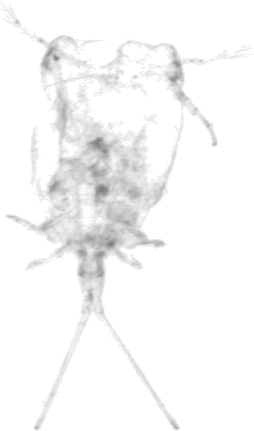


(431, 431)

(256, 256)


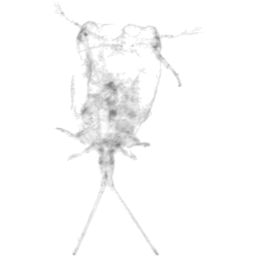

In [59]:
# check downsizing
im_path = 'C:/Users/DAR9KOR/Desktop/data/sample_datasets/EcoTaxa/57398/ZooScanSet/Imgs/Copilia/46926809.jpg'  # pathlib.Path('./57398/ZooScanSet/Imgs/cypris/53379699.jpg')
im = Image.open(im_path)
print(im.size)
display(im) 
print("")

new_im = make_square(im)
print(new_im.size)
print("")

imResize = im_resize(new_im)
print(imResize.size)
display(imResize)

In [ ]:
# check data set size; handling class imbalance for image data (check for imbalance)
#    check total no. of classes, depth of each class (can classify at shallower level using taxonomic tree) 
# select the level to do the classification at (this decides the no. of classes)

# combine classes in similar taxa -> low within-class variance

# different classes have different no. of examples - use taxonomic tree to group

# augment data (crop, translate, rotate, flip)
# - all classes should be represented at each batch

# this should be an N-class classifier (instead of level-wise one-vs-rest)

In [ ]:
# data pre-processing: is it necessary to create separate folders for train & test?
# https://cs230-stanford.github.io/train-dev-test-split.html  -> check for split using image indices 


In [ ]:
# how should the image info be saved & passed to the cnn for training? -> save flattened pixel values as features in csv file


## re-shaping tha data for input to conv net
# https://stackoverflow.com/questions/43235531/convolutional-neural-network-conv1d-input-shape
# http://localhost:8888/notebooks/Desktop/data/HEALTHCARE/EEG/code/GPU_run_CNN/EEG_Classification_CNN_3patients_GPU.ipynb

In [ ]:
# normalization of images?
# /Desktop/data/theory/CNN_deepLearning_part4/sahana_talk/Kaggle_FER2013_Colab-Copy1_CNN_talk.ipynb

In [ ]:
# handling outlier data?

In [ ]:
# should not the no. of model parameters be less than the data available?

In [ ]:
# network to use: built new or previously available? 
# what was used for crystal image data: 
#    Conf. paper (gray scale) : crystalNet (conv-pool * 3 -> conv -> FC -> FC -> output)
#    google paper (color images): variant of Inception v3; (also tried Inception-ResNet-v2, NASNet)
#    arxiv paper :
# check applicability of existing CNN for gray-scale:
# LeNet-5 : for gray scale  -> https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/

# custom CNN:
# https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/
# https://towardsdatascience.com/a-simple-2d-cnn-for-mnist-digit-recognition-a998dbc1e79a

# trying different hyper-parameters
# https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
# https://www.kaggle.com/cdeotte/25-million-images-0-99757-mnist

# use of transfer learning
#https://nbviewer.jupyter.org/github/tirthajyoti/Deep-learning-with-Python/blob/master/Notebooks/Transfer_learning_CIFAR.ipynb

# design of model & loss function suited to task  
# https://www.kaggle.com/iafoss/pretrained-resnet34-with-rgby-0-460-public-lb